In [1]:
# imoort python libraries: numpy, pandas, matplotlib, seaborn, keras, sklearn
import pandas as pd
import numpy as np

# import libraries for visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# import libraries for machine learning
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [27]:
#import libraries for deep learning keras
from keras.models import Sequential # for initializing the neural network
from keras.layers import Dense # for adding layers in the neural network
from keras.wrappers.scikit_learn import KerasClassifier # for using keras with scikit-learn
from keras.utils import np_utils # for using keras with numpy

In [3]:
random_seed = 7
np.random.seed(random_seed)

In [10]:
filename = 'DATA/Iris.csv'

# load the dataset
df = pd.read_csv(filename)

In [11]:
# check if any attribute contains missng values

#count the number of missing values in each column

print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [12]:
print (df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
#   check the data types for each column
print (df.describe(include=None))

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [14]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


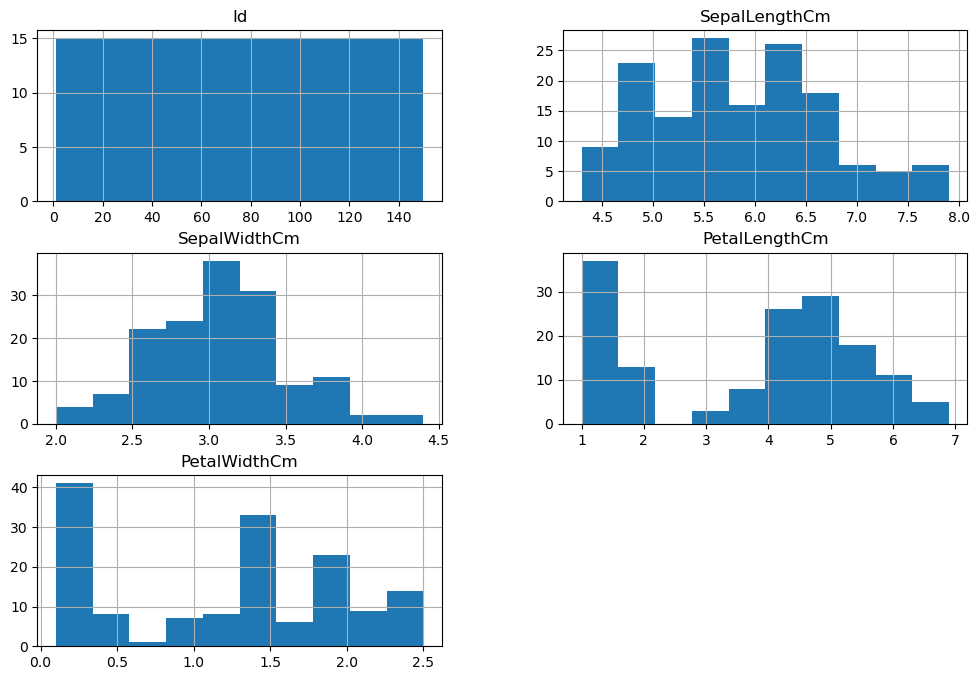

In [15]:
df.hist(figsize=(12, 8))    
pyplot.show()


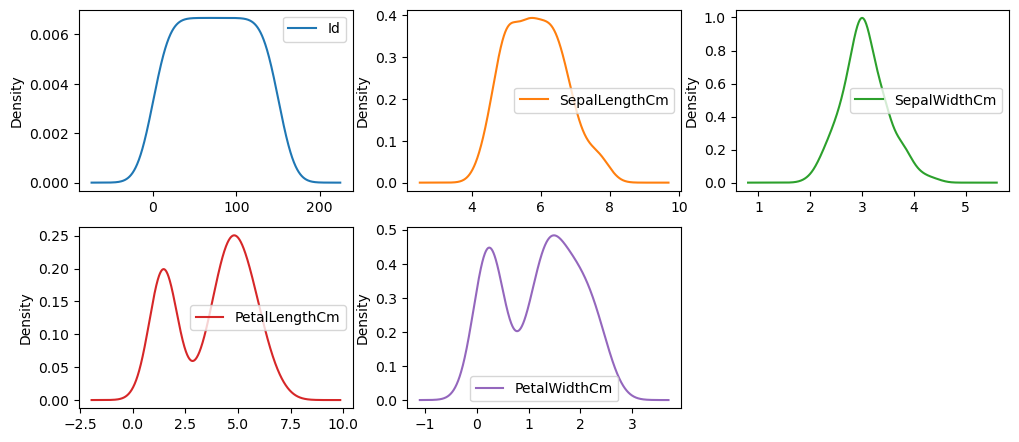

In [16]:
#density plots

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
pyplot.show()

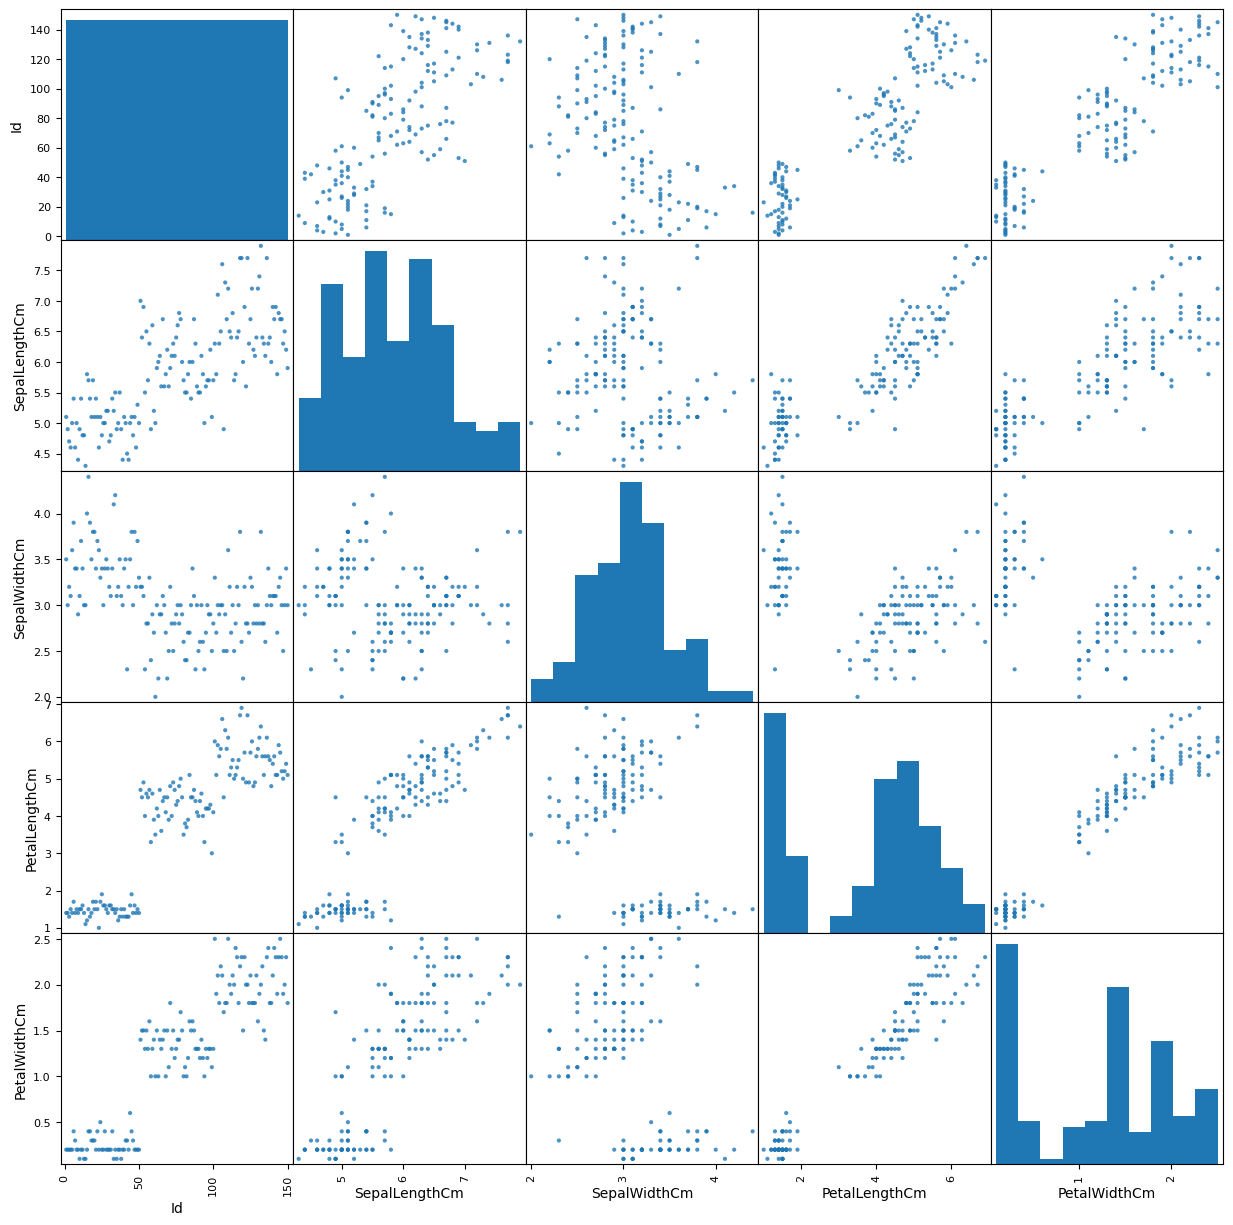

In [17]:
# scatter plot matrix

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

In [18]:
# store the data in numpy arrays
array = df.values

# split the data into input and output variables
# X contains the input variables
X = array[:, 1:5]
# Y contains the output variable
Y = array[:, 5]

In [19]:
# split the data into training and testing sets 67% training and 33% testing
test_size = 0.33

# import the train_test_split function from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=test_size, random_state=random_seed)


In [39]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder

encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

# convert integer to one-hot encoding
onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

# encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

# convert integer to one-hot encoding
onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

In [40]:
# define a functon to create a baseline model
# The network: 2-layered MP = input layer + hidden layer + output layer
# the newwork: optimazation algorithm = adam
# the loss function = categorical_crossentropy
# the evaluation metric = accuracy
# the activation function = relu for the hidden layer and sigmoid for the output layer
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [41]:
# create the model

modle = baseline_model()


In [42]:
# fit the model
history = modle.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Epoch 1/150
100/100 [==============================] - 1s 7ms/step - loss: 3.4541 - accuracy: 0.3600
Epoch 2/150
100/100 [==============================] - 0s 235us/step - loss: 3.2801 - accuracy: 0.3600
Epoch 3/150
100/100 [==============================] - 0s 247us/step - loss: 3.1124 - accuracy: 0.3600
Epoch 4/150
100/100 [==============================] - 0s 235us/step - loss: 2.9474 - accuracy: 0.3600
Epoch 5/150
100/100 [==============================] - 0s 216us/step - loss: 2.7968 - accuracy: 0.3600
Epoch 6/150
100/100 [==============================] - 0s 248us/step - loss: 2.6541 - accuracy: 0.3600
Epoch 7/150
100/100 [==============================] - 0s 240us/step - loss: 2.4922 - accuracy: 0.3600
Epoch 8/150
100/100 [==============================] - 0s 229us/step - loss: 2.3484 - accuracy: 0.3600
Epoch 9/150
100/100 [==============================] - 0s 214us/step - loss: 2.2072 - accuracy: 0.3600
Epoch 10/150
100/100 [==============================] - 0s 230us/step - los

In [43]:
# Create keras classifier for use in scikit-learn

evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [44]:
# evaluate the model using 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [45]:
# evaluate the model
results = cross_val_predict(evaluator, X_train, onehot_Y_train, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
90/90 [==============================] - 1s 8ms/step - loss: 0.9938 - accuracy: 0.3222
Epoch 2/200
90/90 [==============================] - 0s 421us/step - loss: 0.9765 - accuracy: 0.3222
Epoch 3/200
90/90 [==============================] - 0s 429us/step - loss: 0.9600 - accuracy: 0.3222
Epoch 4/200
90/90 [==============================] - 0s 462us/step - loss: 0.9459 - accuracy: 0.3333
Epoch 5/200
90/90 [==============================] - 0s 450us/step - loss: 0.9310 - accuracy: 0.3778
Epoch 6/200
90/90 [==============================] - 0s 480us/step - loss: 0.9156 - accuracy: 0.4222
Epoch 7/200
90/90 [==============================] - 0s 450us/step - loss: 0.8995 - accuracy: 0.5111
Epoch 8/200
90/90 [==============================] - 0s 426us/step - loss: 0.8826 - accuracy: 0.5889
Epoch 9/200
90/90 [==============================] - 0s 420us/step - loss: 0.8649 - accuracy: 0.6111
Epoch 10/200
90/90 [==============================] - 0s 425us/step - loss: 0.8455 - accuracy

In [38]:
# evaluate the model on the test data
scores = modle.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (modle.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 109us/step

accuracy: 100.00%


In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs_range = range(1, len(training_loss) + 1)
plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
